In [3]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf

2023-06-05 18:04:52.212017: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 18:04:52.452797: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 18:04:52.454476: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 18:04:53.444628: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Set Up

In [4]:
data_dir = './AID'
classes = os.listdir(data_dir)

In [4]:
len(classes)

30

In [6]:
# Function to show random image from the dataset 

def random_sample(img_class='all'):
    """
    Returns random images from the dataset
    
    Parameters: 
        img_class: (str) can be 'all', or one of the image classes
        
        
    Returns:
        A random image sample from the data as a NumPy array
    """
    if img_class == 'all':
        class_name = random.choice(classes)
        class_dir = os.path.join(data_dir, class_name)
        imgs = os.listdir(class_dir)
        rndm_img_name = random.choice(imgs)
        img_path = os.path.join(class_dir, rndm_img_name)
        img = plt.imread(img_path)   
        
    elif img_class in classes:
        class_name = img_class
        class_dir = os.path.join(data_dir, class_name)
        imgs = os.listdir(class_dir)
        rndm_img_name = random.choice(imgs)
        img_path = os.path.join(class_dir, rndm_img_name)
        img = plt.imread(img_path)
    
    else:
        print("Please choosetest_gen an appropriate value as 'img_class'")
    
    plt.imshow(img)
    plt.title(f"{class_name}{img.shape}")
    plt.axis(False)
    plt.show()
    
    return img

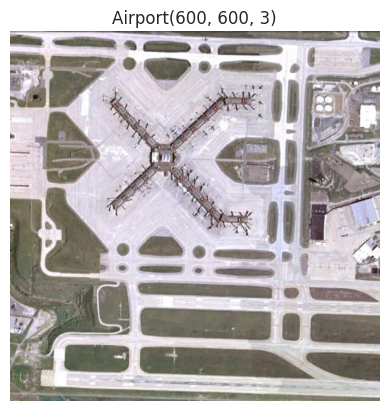

In [7]:
img = random_sample(img_class='Airport')

In [49]:
# How many images we have in each class
for c in classes:
    class_dir = os.path.join(data_dir, c)
    imgs = os.listdir(class_dir)
    print(f"There are {len(imgs)} images in '{c}' class")

There are 260 images in 'Center' class
There are 410 images in 'DenseResidential' class
There are 370 images in 'Farmland' class
There are 340 images in 'Mountain' class
There are 290 images in 'Stadium' class
There are 240 images in 'Church' class
There are 380 images in 'Port' class
There are 390 images in 'Industrial' class
There are 350 images in 'Park' class
There are 370 images in 'Playground' class
There are 310 images in 'BareLand' class
There are 360 images in 'Airport' class
There are 420 images in 'Viaduct' class
There are 410 images in 'River' class
There are 300 images in 'Desert' class
There are 250 images in 'Forest' class
There are 220 images in 'BaseballField' class
There are 390 images in 'Parking' class
There are 260 images in 'RailwayStation' class
There are 360 images in 'Bridge' class
There are 400 images in 'Beach' class
There are 300 images in 'School' class
There are 290 images in 'MediumResidential' class
There are 290 images in 'Resort' class
There are 330 im

# Dataset Split

In [10]:
!pip install split-folders
import splitfolders

  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [11]:
# Create train, test and validation sets
splitfolders.ratio(data_dir, output='output')

# Data Augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   shear_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen =  ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('./output/train',
                                               target_size=(600,600),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)

val_data = val_datagen.flow_from_directory('./output/val',
                                            target_size=(600,600),
                                            batch_size=32,
                                            class_mode='categorical',
                                            seed=42)

test_data = test_datagen.flow_from_directory('./output/test',
                                             target_size=(600,600),
                                             batch_size=32,
                                             class_mode='categorical',
                                             seed=42)

Found 8000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.


# My Models - Trained from scratch

## My Model 1

In [51]:
# Load model
mymodel = tf.keras.models.load_model("./models/models/mymodel1/1")

In [12]:
mymodel.evaluate(test_data)

2023-06-04 17:14:02.057197: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.
2023-06-04 17:14:02.200346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-04 17:14:02.949839: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.
2023-06-04 17:14:03.064903: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 366186496 exceeds 10% of free system memory.
2023-06-04 17:14:03.767885: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.
2023-06-04 17:14:03.922995: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 180652032 exceeds 1

32/32 [==============================] - 35s 1s/step - loss: 1.5038 - accuracy: 0.5350


[1.5038200616836548, 0.5350000262260437]

In [68]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 598, 598, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 299, 299, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 297, 297, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 148, 148, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 32)       0

# EfficientNetB3

## EfficientNetB3 Model 1

In [21]:
EfficientNetB3_model1 = tf.keras.models.load_model("./models/models/efficientNetB3/1")

In [22]:
EfficientNetB3_model1.evaluate(test_data)

2023-06-05 19:09:10.154181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 1/32 [..............................] - ETA: 10:12 - loss: 0.6875 - accuracy: 0.7812

KeyboardInterrupt: 

In [54]:
preds_probs = mymodel.predict(test_data)
len(preds_probs)

2023-06-04 17:55:01.907081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


34/34 [==============================] - 38s 1s/step


1000

## EfficientNetB3 Model 2

In [23]:
# load the model
EfficientNetB3_model2 = tf.keras.models.load_model("./models/models/EfficientNetB3/2")

In [ ]:
EfficientNetB3_model2.evaluate(test_data)

2023-06-05 19:12:46.678853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


18/32 [===============>..............] - ETA: 4:46 - loss: 0.4521 - accuracy: 0.8750

# MobileNetV2

## MobileNetV2 Model 1

In [ ]:
MobileNetV2_model1 = tf.keras.models.load_model("./models/models/mobileNet/1")

In [ ]:
MobileNetV2_model1.evaluate(test_data)

## MobileNetV2 Model 2

In [ ]:
# load the model
MobileNetV2_model2 = tf.keras.models.load_model("./models/models/mobileNet/2")

In [ ]:
MobileNetV2_model2.evaluate(test_data)

# ResNet50V2

## ResNet50V2 Model 1

In [19]:
ResNet50V2_model1 = tf.keras.models.load_model("./models/models/ResNet50V2/1")

In [20]:
ResNet50V2_model1.evaluate(test_data)

2023-06-05 19:08:26.871354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-05 19:08:44.115534: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [32,739328], In[1]: [100352,32]
	 [[{{node sequential/dense/Relu}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/dense/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_8917/3656540485.py", line 1, in <module>
      ResNet50V2_model1.evaluate(test_data)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2072, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1852, in test_function
      return step_function(self, iterator)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1836, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1824, in run_step
      outputs = model.test_step(data)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1788, in test_step
      y_pred = self(x, training=False)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/user/Documents/CNN-Satellite-Image-Classification/venv/lib/python3.10/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential/dense/Relu'
Matrix size-incompatible: In[0]: [32,739328], In[1]: [100352,32]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_test_function_89510]

## ResNet50V2 Model 2